# Project: Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import tweepy
import json
import matplotlib.pyplot as plt
% matplotlib inline

## Gathering
### Data1: The WeRateDogs Twitter archive

In [2]:
twitter_df = pd.read_csv('./data/twitter-archive-enhanced.csv')

In [3]:
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Data2: The tweet image predictions

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
with open('./data/'+ url.split('/')[-1], mode = 'wb') as f:
    f.write(response.content)

In [4]:
image_df = pd.read_csv('./data/image-predictions.tsv', sep = '\t')

In [5]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Data3: *tweet_json.txt* get data by API(include tweet ID, retweet count, and favorite count)

#### Get data from twitter API, and write json contents to `tweet_json.txt` file.

In [7]:
consumer_key = 'xxxxxxxxxx'
consumer_secret = 'xxxxxxxxxx'
access_token = 'xxxxxxxxx'
access_token_secret = 'xxxxxxxxxx'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [8]:
tweet_id = twitter_df.tweet_id

In [87]:
tweet_json = []
tweet_notfound_id = []
for tweeid in tweet_id:
    try:
        tweet = api.get_status(tweeid, tweet_mode = 'extended')
        tweet_json.append(tweet._json)
    except:
        tweet_json.append({'id':tweeid})
        tweet_notfound_id.append(tweeid)

Rate limit reached. Sleeping for: 735
Rate limit reached. Sleeping for: 733


In [14]:
# To see how many data were written to tweet_json, and how many data not found.
len(tweet_json), len(tweet_notfound_id)

(2341, 15)

In [15]:
with open('./data/tweet_json.txt', 'w') as f:
    for item in tweet_json:
        json.dump(item, f)
        f.write("\n")

#### Read data from `tweet_json.txt` file to get `id`, `retweet_count`, `favorite_count`.

In [6]:
tweet_data = []
with open('./data/tweet_json.txt', 'r') as f:  
    for line in f:
        data = json.loads(line)
        dict_data = {'tweet_id': data['id'],
                'retweet_count': data['retweet_count'],
                'favorite_count': data['favorite_count']}
        tweet_data.append(dict_data)

In [7]:
other_df = pd.DataFrame(tweet_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [8]:
other_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8431,38395
1,892177421306343426,6213,32886
2,891815181378084864,4113,24788
3,891689557279858688,8561,41726
4,891327558926688256,9287,39899


## Assessing

#### Data1: twitter_df

In [9]:
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [10]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_df.duplicated().sum()

0

In [12]:
twitter_df.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Cooper         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Bo              9
Winston         9
Sadie           8
the             8
Daisy           7
Buddy           7
Bailey          7
an              7
Toby            7
Jax             6
Jack            6
Rusty           6
Leo             6
Bella           6
Oscar           6
Dave            6
Milo            6
Scout           6
Koda            6
Stanley         6
Louis           5
             ... 
Eleanor         1
Grey            1
Olaf            1
Chesterson      1
Harry           1
Spark           1
Pilot           1
Ralphus         1
Amy             1
Raphael         1
Callie          1
Aubie           1
Mike            1
Tedders         1
River           1
Godi            1
Reagan          1
Lili            1
Tater           1
Lizzie          1
Joshwa          1
Cheesy          1
Snoop           1
Alejandro       1
Brian     

In [13]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
twitter_df.timestamp.sort_values()

2355    2015-11-15 22:32:08 +0000
2354    2015-11-15 23:05:30 +0000
2353    2015-11-15 23:21:54 +0000
2352    2015-11-16 00:04:52 +0000
2351    2015-11-16 00:24:50 +0000
2350    2015-11-16 00:30:50 +0000
2349    2015-11-16 00:35:11 +0000
2348    2015-11-16 00:49:46 +0000
2347    2015-11-16 00:55:59 +0000
2346    2015-11-16 01:01:59 +0000
2345    2015-11-16 01:22:45 +0000
2344    2015-11-16 01:52:02 +0000
2343    2015-11-16 01:59:36 +0000
2342    2015-11-16 02:38:37 +0000
2341    2015-11-16 03:22:39 +0000
2340    2015-11-16 03:44:34 +0000
2339    2015-11-16 03:55:04 +0000
2338    2015-11-16 04:02:55 +0000
2337    2015-11-16 14:57:41 +0000
2336    2015-11-16 15:14:19 +0000
2335    2015-11-16 16:11:11 +0000
2334    2015-11-16 16:37:02 +0000
2333    2015-11-16 19:31:45 +0000
2332    2015-11-16 20:01:42 +0000
2331    2015-11-16 20:32:58 +0000
2330    2015-11-16 21:10:36 +0000
2329    2015-11-16 21:54:18 +0000
2328    2015-11-16 23:23:41 +0000
2327    2015-11-17 00:06:54 +0000
2326    2015-1

In [16]:
twitter_df.expanded_urls.isnull().sum()

59

In [17]:
twitter_df[twitter_df.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [18]:
twitter_df.query('doggo == "None" & floofer == "None" & pupper == "None" & puppo == "None"').shape

(1976, 17)

#### Data2: image_df

In [19]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### Data3: other_df

In [21]:
other_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8431,38395
1,892177421306343426,6213,32886
2,891815181378084864,4113,24788
3,891689557279858688,8561,41726
4,891327558926688256,9287,39899


In [22]:
other_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null int64
retweet_count     2341 non-null int64
favorite_count    2341 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### Assessing conclusion
### Quality
#### twitter_df  
 - There are many missing values(NaN) in **columns in_reply_to_status_id**, **in_reply_to_user_id**, and some missing values in column **expanded_urls**.
 - Only 181 data have values in **retweeted_status_id**, **retweeted_status_user_id**, **retweeted_status_timestamp** three column which means these data are retweets.(Need to remove)
 - Columns **tweet_id, in_reply_to_status_id**, **in_reply_to_user_id**, **retweeted_status_id**, **retweeted_status_user_id** should be object type.
 - Column **timestamp** should be datetime type.
 - Some records in **rating_numerator** and **rating_denominator** are incorrect. For example, the 2335th data should be 9/10 instead 1/2.
 - In **rating_denominator**, the value should be **10**, but there are few values not equal to 10.
 - In **rating_numerator**, some values small than 10 which may not about dogs.
 - In columns **doggo**,**floofer**,**pupper** and **puppo**, some data have None in each four.
 - Some strange name in **name**, such as a, an, the...etc.
  
#### image_df
 - **tweet_id** should be object type.
  
#### other_df
 - **tweet_id** should be object type.
  
### Tidiness
#### twitter_df
 - **doggo**,**floofer**,**pupper** and **puppo** can combine to one column called **stage**.
  
#### image_df
 - Columns **jpg_url** and **p1** can combine to `twitter_df`.
  
#### other_df
 - This dataframe can combine to `twitter_df`.

## Cleaning

In [23]:
twitter_clean = twitter_df.copy()
image_clean = image_df.copy()
other_clean = other_df.copy()

#### Fill in missing values in columns in_reply_to_status_id, in_reply_to_user_id and expanded_urls
#### Define

For columns **in_reply_to_status_id** and **in_reply_to_user_id**, if they are NaN means those Tweets are not reply. Hence, just fill **None** to those data.  
For column **expanded_urls**, check the missing value from `tweet_json.txt` file. If the values do not exist, fill **None** in the corresponding data.

#### Code

In [24]:
twitter_clean.in_reply_to_status_id.fillna('None', inplace = True)

In [25]:
twitter_clean.in_reply_to_user_id.fillna('None', inplace = True)

expanded_urls

In [27]:
tweet_json = []
with open('./data/tweet_json.txt', 'r') as f:  
    for line in f:
        tweet_json.append(json.loads(line))

In [28]:
url_null_index = list(twitter_clean.expanded_urls[twitter_clean.expanded_urls.isnull()].index)
url_null_id = twitter_clean.tweet_id[url_null_index]
url_null_df = pd.DataFrame({'tweet_id': url_null_id,
                            'null_index': url_null_index})

In [29]:
url_id = []
expanded_url = []
for i in tweet_json:
    url_id.append(i['id'])
    try:
        expanded_url.append(i['entities']['media'][0]['expanded_url'])
    except:
        expanded_url.append('None')

url_df = pd.DataFrame({'tweet_id': url_id,
          'expanded_urls_extract': expanded_url})

In [30]:
url_modify = pd.merge(url_null_df, url_df, on = 'tweet_id', how = 'left').set_index('null_index')

In [31]:
url_modify.head()

,tweet_id,expanded_urls_extract
null_index,,
30,886267009285017600,None
55,881633300179243008,None
64,879674319642796034,None
113,870726314365509632,None
148,863427515083354112,None


In [32]:
twitter_clean.loc[list(url_modify.index), 'expanded_urls'] = url_modify.expanded_urls_extract

#### Test

In [33]:
twitter_clean.in_reply_to_user_id.isnull().sum()

0

In [34]:
twitter_clean.in_reply_to_status_id.isnull().sum()

0

In [35]:
twitter_clean.expanded_urls.isnull().sum()

0

#### We do not need data which are retweeted.
#### Define

If one of these columns which are retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp has value means the data is retweet, else is original tweet. So I will remove the data which have value in these columns. In addition, I will drop these three columns after removing retweet data.

#### Code

In [36]:
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()].reset_index(drop = True)

In [37]:
twitter_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

#### Test

In [38]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: int64(3), object(11)
memory usage: 238.0+ KB


#### Columns tweet_id, in_reply_to_status_id, in_reply_to_user_id should be object type.
#### Define

Use function **astype()** in pandas to convert data type from int/float to string.

#### Code

In [39]:
twitter_clean[twitter_clean.in_reply_to_status_id != 'None'].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886267009285017600,8.86266e+17,2.28118e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None,12,10,None,None,None,None,None
52,881633300179243008,8.81607e+17,4.73844e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,None,17,10,None,None,None,None,None
61,879674319642796034,8.79554e+17,3.10544e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,None,14,10,None,None,None,None,None


In [40]:
twitter_clean.tweet_id = twitter_clean.tweet_id.astype(str)

twitter_clean.in_reply_to_status_id = [int(i) if (i != 'None') else i for i in twitter_clean.in_reply_to_status_id]
twitter_clean.in_reply_to_status_id = twitter_clean.in_reply_to_status_id.astype(str)
twitter_clean.in_reply_to_user_id = [int(i) if (i != 'None') else i for i in twitter_clean.in_reply_to_user_id]
twitter_clean.in_reply_to_user_id = twitter_clean.in_reply_to_user_id.astype(str)

#### Test

In [41]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2175 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: int64(2), object(12)
memory usage: 238.0+ KB


In [42]:
twitter_clean[twitter_clean.in_reply_to_status_id != 'None'].head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
29,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,None,12,10,None,None,None,None,None
52,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,None,17,10,None,None,None,None,None
61,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,None,14,10,None,None,None,None,None


#### Column timestamp should be datetime type.
#### Define

Use **pd.to_datetime()** convert column timestamp to datetime type.

#### Code

In [43]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

#### Test

In [44]:
twitter_clean.timestamp.head()

0   2017-08-01 16:23:56
1   2017-08-01 00:17:27
2   2017-07-31 00:18:03
3   2017-07-30 15:58:51
4   2017-07-29 16:00:24
Name: timestamp, dtype: datetime64[ns]

#### Some records in rating_numerator and rating_denominator are incorrect. For example, the 2335th data should be 9/10 instead 1/2.
#### Define

Extract rating values from text to replace original rating values.

#### Code

In [45]:
import re
rating = []
for item in twitter_clean.text:
    rate = re.findall(r'(\d+[.\d]?/\d+)', item)[-1]
    rating.append(rate)

In [46]:
rating_numerator = list(float(i.split('/')[0]) for i in rating)
rating_denominator = list(float(i.split('/')[1]) for i in rating)

twitter_clean.rating_numerator = rating_numerator
twitter_clean.rating_denominator = rating_denominator

#### Test

In [47]:
twitter_clean[['rating_numerator','rating_denominator']].sample(5)

,rating_numerator,rating_denominator
626,11.0,10.0
1631,11.0,10.0
1648,10.0,10.0
2140,10.0,10.0
367,11.0,10.0


In [48]:
twitter_clean[['rating_numerator','rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 2 columns):
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
dtypes: float64(2)
memory usage: 34.1 KB


#### In rating_denominator, the value should be 10, but there are few values not equal to 10.
#### Define

If rating_denominator is multiple of 10, then there may have more than one dog in the picture. So I will drop the data which are not multiple of 10 and manipulation others by divide it by 10 in both rating_numerator and rating_denominator.

#### Code

In [49]:
sum(twitter_clean.rating_denominator != 10)

16

In [50]:
twitter_clean = twitter_clean[(twitter_clean.rating_denominator % 10) == 0]

In [51]:
divide_num = twitter_clean.rating_denominator/10
twitter_clean.rating_numerator = [x/y for x,y in zip(twitter_clean.rating_numerator, divide_num)]
twitter_clean.rating_denominator = [x/y for x,y in zip(twitter_clean.rating_denominator, divide_num)]

#### Test

In [52]:
sum(twitter_clean.rating_denominator != 10)

0

#### In rating_numerator, some values are smaller than 10 which may not about dogs.
#### Define

Some values in rating_numerator are smaller than 10, so I will drop these data from `twitter_df`.

#### Code

In [53]:
twitter_clean = twitter_clean[~(twitter_clean.rating_numerator < 10)].reset_index(drop = True)

#### Test

In [54]:
twitter_clean.rating_numerator.value_counts()

12.0      504
10.0      436
11.0      432
13.0      311
14.0       44
420.0       2
666.0       1
1776.0      1
75.0        1
182.0       1
26.0        1
27.0        1
15.0        1
Name: rating_numerator, dtype: int64

In [55]:
twitter_clean.shape

(1736, 14)

#### In columns doggo,floofer,pupper and puppo, some data have None in each four. Also combine them to one column called stage.
#### Define

First, combine these four columns to a column called stage. Then extract these stage from text again, and compare it with the column stage just combined before.

#### Code

In [56]:
stage_df = twitter_clean.copy()
stage_df = twitter_clean[['tweet_id', 'doggo', 'floofer', 'pupper', 'puppo']]

In [57]:
stage_check = []
for text in twitter_clean.text:
    if 'doggo' in text:
        stage_check.append('doggo')
    elif 'floofer' in text:
        stage_check.append('floofer')
    elif 'pupper' in text:
        stage_check.append('pupper')
    elif 'puppo' in text:
        stage_check.append('puppo')
    else:
        stage_check.append('None')

In [58]:
stage_df.insert(loc = 5,column = 'stage_check', value = stage_check)

In [59]:
stage_df = pd.melt(stage_df, id_vars = ['tweet_id','stage_check'], var_name='stage', value_name='value')

In [60]:
stage_df.head()

,tweet_id,stage_check,stage,value
0,892420643555336193,None,doggo,None
1,892177421306343426,None,doggo,None
2,891815181378084864,None,doggo,None
3,891689557279858688,None,doggo,None
4,891327558926688256,None,doggo,None


In [61]:
for index, row in stage_df.iterrows():
    if row.value == 'None':
        row.stage = 'unknown'

In [62]:
for index, row in stage_df.iterrows():
    if ((row.stage_check != 'None') & (row.stage == 'unknown')):
        row.stage = row.stage_check

In [63]:
stage_df.drop(['stage_check','value'], axis = 1, inplace = True)

In [64]:
stage_df.drop_duplicates(inplace = True)

In [65]:
stage_df[stage_df['tweet_id'].duplicated()]

,tweet_id,stage
1907,854010172552949760,floofer
2005,834089966724603904,unknown
2104,819006400881917954,unknown
2105,819004803107983360,unknown
2322,781308096455073793,unknown
2381,771908950375665664,unknown
2489,752660715232722944,unknown
2522,749317047558017024,floofer
2526,748932637671223296,unknown
2606,737445876994609152,floofer


In [66]:
stage_df.head()

,tweet_id,stage
0,892420643555336193,unknown
1,892177421306343426,unknown
2,891815181378084864,unknown
3,891689557279858688,unknown
4,891327558926688256,unknown


In [67]:
duplicate = list(stage_df.tweet_id[stage_df.tweet_id.duplicated()])

In [68]:
stage_df = stage_df[~((stage_df.tweet_id.isin(duplicate)) & (stage_df.stage == 'unknown'))]

In [69]:
duplicate_id = list(stage_df.tweet_id[stage_df['tweet_id'].duplicated()])

In [70]:
for index, row in stage_df.iterrows():
    if row.tweet_id in duplicate_id:
        row.stage = 'multiple'

In [71]:
stage_df.drop_duplicates(inplace = True)

In [72]:
twitter_clean = pd.merge(twitter_clean, stage_df, on = 'tweet_id', how = 'right')
twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis = 1, inplace = True)

#### Test

In [73]:
twitter_clean.stage.value_counts()

unknown     1404
pupper       204
doggo         78
puppo         30
multiple      11
floofer        9
Name: stage, dtype: int64

In [74]:
twitter_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
143,859924526012018688,None,None,2017-05-04 00:15:58,"<a href=""http://twitter.com/download/iphone"" r...",Meet Milky. She has no idea what happened. Jus...,https://twitter.com/dog_rates/status/859924526...,12.0,10.0,Milky,unknown
1095,703611486317502464,None,None,2016-02-27 16:03:45,"<a href=""http://twitter.com/download/iphone"" r...",Meet Scooter. He's experiencing the pupper equ...,https://twitter.com/dog_rates/status/703611486...,10.0,10.0,Scooter,pupper
837,743210557239623680,None,None,2016-06-15 22:36:19,"<a href=""http://twitter.com/download/iphone"" r...","Meet Kayla, an underground poker legend. Playe...",https://twitter.com/dog_rates/status/743210557...,10.0,10.0,Kayla,unknown
915,727524757080539137,None,None,2016-05-03 15:46:33,"<a href=""http://twitter.com/download/iphone"" r...",This pupper had to undergo emergency haircut s...,https://twitter.com/dog_rates/status/727524757...,10.0,10.0,None,pupper
455,803380650405482500,None,None,2016-11-28 23:30:47,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sonny. He's an in-home movie critic. That...,https://twitter.com/dog_rates/status/803380650...,12.0,10.0,Sonny,unknown
683,763956972077010945,763865174553964544,15846407,2016-08-12 04:35:10,"<a href=""http://twitter.com/download/iphone"" r...",@TheEllenShow I'm not sure if you know this bu...,None,12.0,10.0,None,doggo
8,890609185150312448,None,None,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13.0,10.0,Zoey,unknown
1108,702276748847800320,None,None,2016-02-23 23:39:59,"<a href=""http://twitter.com/download/iphone"" r...","""AND IIIIIIIIIIIEIIIIIIIIIIIII WILL ALWAYS LOV...",https://twitter.com/dog_rates/status/702276748...,11.0,10.0,None,unknown
27,886680336477933568,None,None,2017-07-16 20:14:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Derek. He's late for a dog meeting. 13...,https://twitter.com/dog_rates/status/886680336...,13.0,10.0,Derek,unknown
1401,677716515794329600,None,None,2015-12-18 05:06:23,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,https://twitter.com/dog_rates/status/677716515...,12.0,10.0,None,unknown


In [75]:
twitter_clean.shape

(1736, 11)

#### Some strange name in name, such as a, an, the...etc.
#### Define

If the first word in name is not uppercase, then this name is nonsense. I will store these kind of names in **strange_name**, and replace these name by **anonymous** so as which name is **None**.

#### Code

In [76]:
dogname = list(twitter_clean.name.unique())

In [77]:
strange_name = ['None']

[strange_name.append(i)  for i in dogname if (i[0].isupper() == False)];

In [78]:
twitter_clean.name.replace(strange_name, 'anonymous', inplace = True)

In [79]:
for i in twitter_clean[['tweet_id','text','name']][twitter_clean.name == 'anonymous'].text:
    print(i)

Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
I have a new hero and his name is Howard. 14/10 https://t

In [80]:
anonymous_df = twitter_clean[['tweet_id','text','name']][twitter_clean.name == 'anonymous']

In [81]:
extract_name = anonymous_df.text.str.extract(r'(?:name is|named|name to|NAME. IS.|THIS IS|that|That is) ([A-Z][a-z]{2,12})', expand = True)
anonymous_df['extract_name'] = extract_name

In [82]:
anonymous_df.extract_name.fillna('anonymous', inplace = True)
anonymous_df.drop(['text', 'name'], axis = 1, inplace = True)

In [83]:
twitter_clean = pd.merge(twitter_clean, anonymous_df, on = 'tweet_id', how = 'left')
twitter_clean.extract_name.fillna('anonymous', inplace = True)

In [84]:
for i in range(twitter_clean.shape[0]):
    if ((twitter_clean.loc[i,'name'] == 'anonymous') & (twitter_clean.loc[i,'extract_name'] != 'anonymous')):
        twitter_clean.loc[i,'name'] = twitter_clean.loc[i,'extract_name']

In [85]:
twitter_clean.drop('extract_name', axis = 1, inplace = True)

#### Test

In [86]:
twitter_clean.name.value_counts()

anonymous    578
Charlie       11
Lucy          10
Cooper         9
Oliver         9
Tucker         8
Sadie          7
Winston        7
Penny          7
Daisy          6
Lola           6
Koda           6
Toby           6
Bo             6
Jax            5
Louis          5
Stanley        5
Bentley        5
Bailey         5
Milo           5
Leo            5
Oscar          5
Scooter        4
Sophie         4
Sammy          4
Jack           4
Bella          4
Archie         4
Finn           4
Winnie         4
            ... 
Arlo           1
Lizzie         1
Pilot          1
Iggy           1
Gidget         1
Julio          1
Dante          1
Batdog         1
Tedders        1
Rodney         1
Ralphson       1
Wishes         1
Milky          1
Pip            1
Lambeau        1
DayZ           1
Herm           1
Stuart         1
Hazel          1
Benji          1
Alfredo        1
Acro           1
Harper         1
Lucia          1
Snicku         1
Ralphus        1
Howard         1
Callie        

In [87]:
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1439,675845657354215424,None,None,2015-12-13 01:12:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Pepper. She's not fully comfortable ri...,https://twitter.com/dog_rates/status/675845657...,10.0,10.0,Pepper,pupper
1661,668655139528511488,None,None,2015-11-23 04:59:42,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,https://twitter.com/dog_rates/status/668655139...,11.0,10.0,Winifred,unknown
202,847116187444137987,None,None,2017-03-29 16:00:12,"<a href=""http://twitter.com/download/iphone"" r...",Unbelievable... We. Only. Rate. Dogs. Please s...,https://twitter.com/dog_rates/status/847116187...,11.0,10.0,anonymous,unknown
1057,707021089608753152,None,None,2016-03-08 01:52:18,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He's a Dasani Episcopalian. Go...,https://twitter.com/dog_rates/status/707021089...,12.0,10.0,Tucker,unknown
4,891327558926688256,None,None,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,unknown


#### In `image_id` and `other_id` tweet_id should be object type.
#### Define

Use **astype()** in pandas to convert tweet_id to string.

#### Code

In [88]:
image_clean.tweet_id = image_clean.tweet_id.astype(str)
other_clean.tweet_id = other_clean.tweet_id.astype(str)

#### Test

In [89]:
image_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [90]:
other_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

#### Merge three dataframe to one dataframe
#### Define

Merge `image_df` and `other_df` to `twitter_df` on the column **tweet_id**.

#### Code

In [91]:
image_clean = image_clean[['tweet_id', 'jpg_url', 'p1']]
image_clean.rename(columns = {'p1':'breed'}, inplace = True)

In [92]:
twitter_clean = pd.merge(twitter_clean, image_clean, on = 'tweet_id', how = 'left')

In [93]:
twitter_clean = pd.merge(twitter_clean, other_clean, on = 'tweet_id', how = 'left')

#### Test

In [94]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,breed,retweet_count,favorite_count
0,892420643555336193,None,None,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,8431.0,38395.0
1,892177421306343426,None,None,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6213.0,32886.0
2,891815181378084864,None,None,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4113.0,24788.0
3,891689557279858688,None,None,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,unknown,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,8561.0,41726.0
4,891327558926688256,None,None,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,unknown,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,9287.0,39899.0


In [95]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1736 entries, 0 to 1735
Data columns (total 15 columns):
tweet_id                 1736 non-null object
in_reply_to_status_id    1736 non-null object
in_reply_to_user_id      1736 non-null object
timestamp                1736 non-null datetime64[ns]
source                   1736 non-null object
text                     1736 non-null object
expanded_urls            1736 non-null object
rating_numerator         1736 non-null float64
rating_denominator       1736 non-null float64
name                     1736 non-null object
stage                    1736 non-null object
jpg_url                  1574 non-null object
breed                    1574 non-null object
retweet_count            1735 non-null float64
favorite_count           1735 non-null float64
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 217.0+ KB


#### Deal with `twitter_clean` dataframe which have missing values after combined with the other two dataframes.
#### Define

In columns **retweet_count** and **favorite_count** have only one missing value, so I will fill it in with 0. In columns **jpg_url** and **breed** have 163 missing values. However, we need picture in final prediction so the data which have missing value in **jpg_url** and **breed** should be remove.

#### Code

In [96]:
twitter_clean.retweet_count.fillna(0, inplace = True)
twitter_clean.favorite_count.fillna(0, inplace = True)

In [97]:
twitter_clean.dropna(axis = 0, inplace = True)

#### Test

In [98]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1574 entries, 0 to 1735
Data columns (total 15 columns):
tweet_id                 1574 non-null object
in_reply_to_status_id    1574 non-null object
in_reply_to_user_id      1574 non-null object
timestamp                1574 non-null datetime64[ns]
source                   1574 non-null object
text                     1574 non-null object
expanded_urls            1574 non-null object
rating_numerator         1574 non-null float64
rating_denominator       1574 non-null float64
name                     1574 non-null object
stage                    1574 non-null object
jpg_url                  1574 non-null object
breed                    1574 non-null object
retweet_count            1574 non-null float64
favorite_count           1574 non-null float64
dtypes: datetime64[ns](1), float64(4), object(10)
memory usage: 196.8+ KB


## Storing

In [99]:
twitter_clean.to_csv('./data/twitter_archive_master.csv', index = False)

## Analyzing and Visualizing

In [101]:
df = pd.read_csv('./data/twitter_archive_master.csv')
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,jpg_url,breed,retweet_count,favorite_count
0,892420643555336193,None,None,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,unknown,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,8431.0,38395.0
1,892177421306343426,None,None,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,unknown,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,6213.0,32886.0
2,891815181378084864,None,None,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,unknown,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,4113.0,24788.0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 15 columns):
tweet_id                 1574 non-null int64
in_reply_to_status_id    1574 non-null object
in_reply_to_user_id      1574 non-null object
timestamp                1574 non-null object
source                   1574 non-null object
text                     1574 non-null object
expanded_urls            1574 non-null object
rating_numerator         1574 non-null float64
rating_denominator       1574 non-null float64
name                     1574 non-null object
stage                    1574 non-null object
jpg_url                  1574 non-null object
breed                    1574 non-null object
retweet_count            1574 non-null float64
favorite_count           1574 non-null float64
dtypes: float64(4), int64(1), object(10)
memory usage: 184.5+ KB


In [103]:
df.tweet_id = df.tweet_id.astype(str)
df.timestamp = pd.to_datetime(df.timestamp)

In [104]:
df[['tweet_id', 'timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 2 columns):
tweet_id     1574 non-null object
timestamp    1574 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 24.7+ KB


In [105]:
df.describe()

,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1574.000000,1574.0,1574.000000,1574.000000
mean,12.870394,10.0,3152.865311,10433.932656
std,45.690434,0.0,5230.508910,13855.939454
min,10.000000,10.0,0.000000,0.000000
25%,10.000000,10.0,748.500000,2506.500000
50%,11.000000,10.0,1692.000000,5562.500000
75%,12.000000,10.0,3603.750000,13467.250000
max,1776.000000,10.0,84502.000000,164884.000000


#### 1. Top 10 breed in all data

In [106]:
top10_breed = df.breed.value_counts()[:10]
top10_breed

golden_retriever      132
Labrador_retriever     86
Pembroke               82
Chihuahua              61
chow                   41
pug                    40
Samoyed                39
Pomeranian             36
toy_poodle             33
malamute               26
Name: breed, dtype: int64

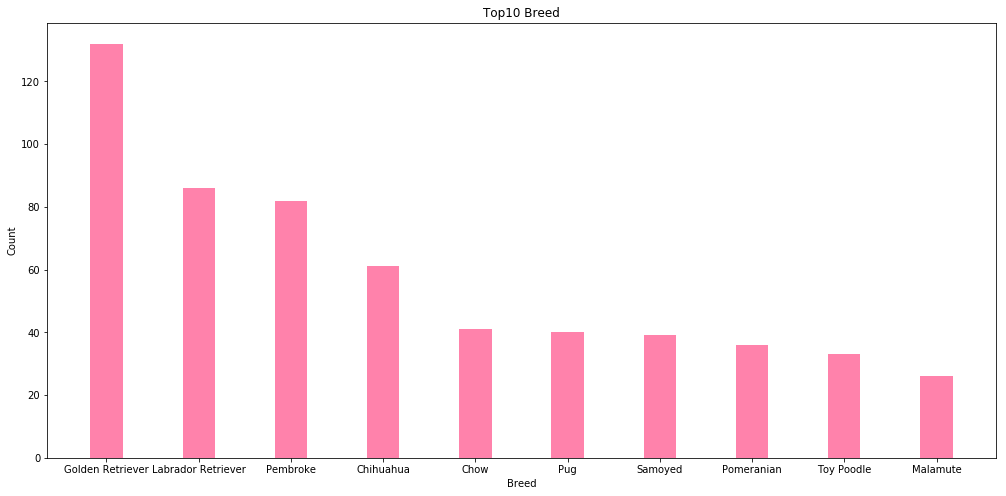

In [107]:
x = np.arange(10)
tick_label = ['Golden Retriever','Labrador Retriever','Pembroke','Chihuahua','Chow','Pug','Samoyed','Pomeranian','Toy Poodle','Malamute']

fig, ax = plt.subplots(figsize = (17,8))
ax.bar(x, top10_breed, width = .35, tick_label = tick_label, color = '#FF82AB')
ax.set_title('Top10 Breed')
ax.set_xlabel('Breed')
ax.set_ylabel('Count');

fig.savefig('./image/top10_breed.png', bbox_inches='tight');

#### 2. Proportion of higher rating and lower rating in top 10 breed

In [108]:
rating_high = df.query('rating_numerator > 11')
rating_low = df.query('rating_numerator <= 11')

In [109]:
prop_high = rating_high.breed.value_counts()[top10_breed.index]/top10_breed
prop_low = rating_low.breed.value_counts()[top10_breed.index]/top10_breed
prop_df = pd.DataFrame({'higher rating':prop_high, 'lower rating': prop_low})
prop_df

,higher rating,lower rating
golden_retriever,0.643939,0.356061
Labrador_retriever,0.465116,0.534884
Pembroke,0.585366,0.414634
Chihuahua,0.557377,0.442623
chow,0.560976,0.439024
pug,0.300000,0.700000
Samoyed,0.564103,0.435897
Pomeranian,0.416667,0.583333
toy_poodle,0.454545,0.545455
malamute,0.384615,0.615385


In [111]:
import urllib

In [115]:
golden_retriever_url = df[df.breed == 'golden_retriever'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(golden_retriever_url, "./image/golden_retriever.jpg");

In [114]:
labrador_retriever_url = df[df.breed == 'Labrador_retriever'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(labrador_retriever_url, "./image/labrador_retriever.jpg");

In [116]:
pembroke_url = df[df.breed == 'Pembroke'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(pembroke_url, "./image/pembroke.jpg");

In [117]:
chihuahua_url = df[df.breed == 'Chihuahua'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(chihuahua_url, "./image/chihuahua.jpg");

In [118]:
chow_url = df[df.breed == 'chow'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(chow_url, "./image/chow.jpg");

In [119]:
pug_url = df[df.breed == 'pug'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(pug_url, "./image/pug.jpg");

In [120]:
samoyed_url = df[df.breed == 'Samoyed'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(samoyed_url, "./image/samoyed.jpg");

In [121]:
pomeranian_url = df[df.breed == 'Pomeranian'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(pomeranian_url, "./image/pomeranian.jpg");

In [122]:
toy_poodle_url = df[df.breed == 'toy_poodle'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(toy_poodle_url, "./image/toy_poodle.jpg");

In [123]:
malamute_url = df[df.breed == 'malamute'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(malamute_url, "./image/malamute.jpg");

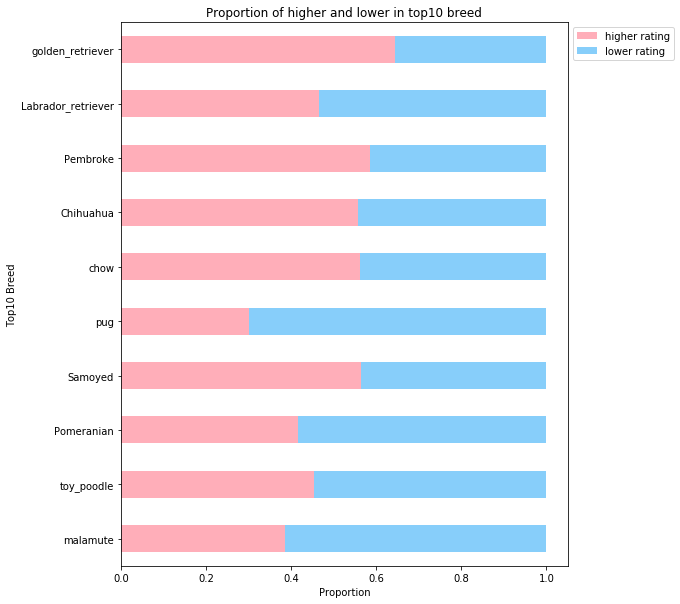

In [124]:
prop_df = prop_df[::-1]
ax = prop_df.plot(kind='barh', stacked=True, figsize = (8,10), edgecolor = 'none', color = ['#FFAEB9','#87CEFA'])
ax.legend(bbox_to_anchor = (1,1), loc = 'upper left')
ax.set_title('Proportion of higher and lower in top10 breed')
ax.set_xlabel('Proportion')
ax.set_ylabel('Top10 Breed');

fig = ax.get_figure()
fig.savefig('./image/proportion_of_high_low.png', bbox_inches='tight');

#### 3. Compare the distribution of stage between which have higher rating numerator and lower rating numerator.  
Stage will ignore the data which are unknown. Higher rating and lower rating are distinguish by median of rating numerator.

In [125]:
import urllib.request

In [126]:
pupper_url = df[df.stage == 'pupper'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(pupper_url, "./image/pupper.jpg");

In [127]:
doggo_url = df[df.stage == 'doggo'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(doggo_url, "./image/doggo.jpg");

In [128]:
puppo_url = df[df.stage == 'puppo'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(puppo_url, "./image/puppo.jpg");

In [129]:
floofer_url = df[df.stage == 'floofer'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(floofer_url, "./image/floofer.jpg");

In [130]:
multiple_url = df[df.stage == 'multiple'].jpg_url.sample(1, random_state = 10).values[0]
urllib.request.urlretrieve(multiple_url, "./image/multiple.jpg");

In [131]:
rating_numerator_high = df.query('rating_numerator > 11 & stage != "unknown"')
rating_numerator_low = df.query('rating_numerator <= 11 & stage != "unknown"')

In [132]:
high_stage = rating_numerator_high.stage.value_counts()
low_stage = rating_numerator_low.stage.value_counts()

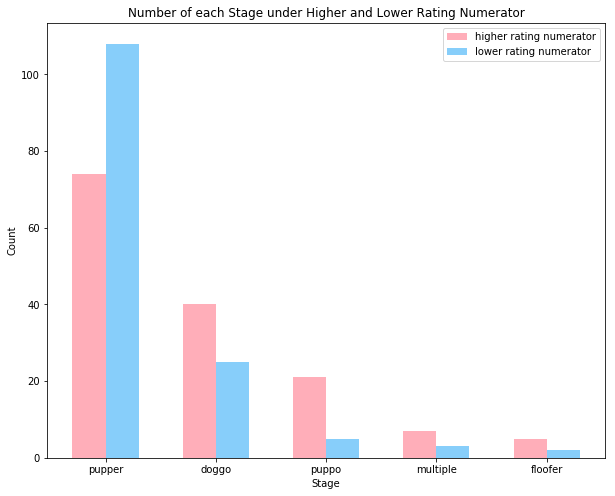

In [133]:
x = np.arange(5)
bar_width = .3

fig, ax = plt.subplots(figsize = (10, 8))
ax.bar(x, high_stage, bar_width, color = '#FFAEB9', label = 'higher rating numerator')
ax.bar(x + bar_width, low_stage, bar_width, color = '#87CEFA', label = 'lower rating numerator')
ax.set_xticks(x + bar_width/2)
ax.set_xticklabels(['pupper', 'doggo', 'puppo', 'multiple', 'floofer'])
ax.set_title('Number of each Stage under Higher and Lower Rating Numerator')
ax.set_xlabel('Stage')
ax.set_ylabel('Count')
ax.legend(loc = 'upper right');

fig.savefig('./image/number_of_stage.png', bbox_inches='tight');

#### 4. Correlation between retweet count and favorite count is positive or negative ?

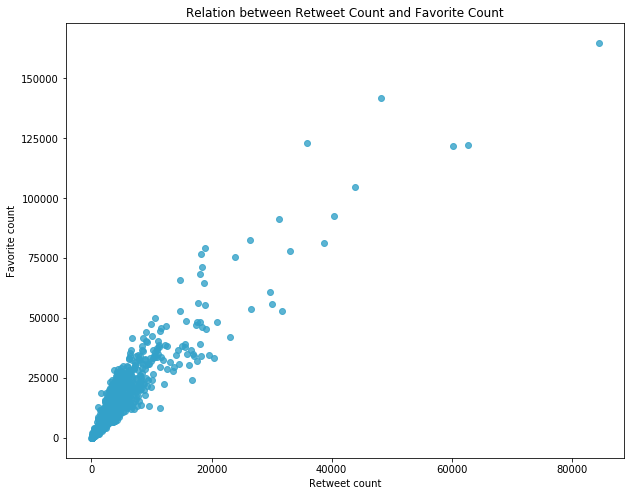

In [134]:
# retweet_count & favorite_count
fig, ax = plt.subplots(figsize = (10, 8))
ax.scatter(df.retweet_count, df.favorite_count, alpha = .8, color = '#33A1C9')
ax.set_title('Relation between Retweet Count and Favorite Count')
ax.set_xlabel('Retweet count')
ax.set_ylabel('Favorite count');

fig.savefig('./image/retweet_favorite_scatter.png', bbox_inches='tight');